In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from datetime import datetime

def time_to_seconds(t):
    dt = datetime.strptime(t, "%H:%M:%S.%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

vectorized_time_to_seconds = np.vectorize(time_to_seconds)

In [18]:
file_dir = "../simulation/measurements/files"

particle_counts = [1500, 3500, 7500, 17000, 37000, 85000, 190000, 420000, 950000, 2200000, 5000000]
modes = ["computeShaders", "sequential", "parallel"]

In [19]:
# 06-06 17:17:02.384 25325 25358 I Timer   : Elapsed time: 8.342025 ms

pd_cs = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])
pd_seq = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])
pd_par = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])

pd_cs["particle_count"] = particle_counts
pd_seq["particle_count"] = particle_counts
pd_par["particle_count"] = particle_counts

thousands = []
thousands_time_stamps = []
hundred_thousands = []
hundred_thousands_time_stamps = []
millions = []
millions_time_stamps = []

for mode in modes:
    avg_times = []
    avg_times_err = []
    avg_times_per_particle = []
    avg_times_per_particle_err = []
    for count in particle_counts:
        file = open(f"{file_dir}/logs_{count}_{mode}1.txt", "r").read()

        all_times = []
        all_time_stamps = []
        for line in file.split("\n"):
            if "ms" in line:
                time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                time_stamp = line.split(" ")[1]
                all_times.append(time)
                all_time_stamps.append(time_stamp)

        if count == 1500:
            thousands.append(all_times)
            thousands_time_stamps.append(all_time_stamps)
        if count == 190000:
            hundred_thousands.append(all_times)
            hundred_thousands_time_stamps.append(all_time_stamps)
        if count == 950000:
            millions.append(all_times)
            millions_time_stamps.append(all_time_stamps)

        avg_time = np.mean(all_times)
        avg_time_err = np.std(all_times)
        avg_time_per_particle = avg_time / count
        avg_time_per_particle_err = avg_time_err / count

        avg_times.append(avg_time)
        avg_times_err.append(avg_time_err)
        avg_times_per_particle.append(avg_time_per_particle)
        avg_times_per_particle_err.append(avg_time_per_particle_err)

    if mode == "computeShaders":
        pd_cs["avg_time"] = avg_times
        pd_cs["avg_time_err"] = avg_times_err
        pd_cs["avg_time_per_particle"] = avg_times_per_particle
        pd_cs["avg_time_per_particle_err"] = avg_times_per_particle_err
    elif mode == "sequential":
        pd_seq["avg_time"] = avg_times
        pd_seq["avg_time_err"] = avg_times_err
        pd_seq["avg_time_per_particle"] = avg_times_per_particle
        pd_seq["avg_time_per_particle_err"] = avg_times_per_particle_err
    elif mode == "parallel":
        pd_par["avg_time"] = avg_times
        pd_par["avg_time_err"] = avg_times_err
        pd_par["avg_time_per_particle"] = avg_times_per_particle
        pd_par["avg_time_per_particle_err"] = avg_times_per_particle_err

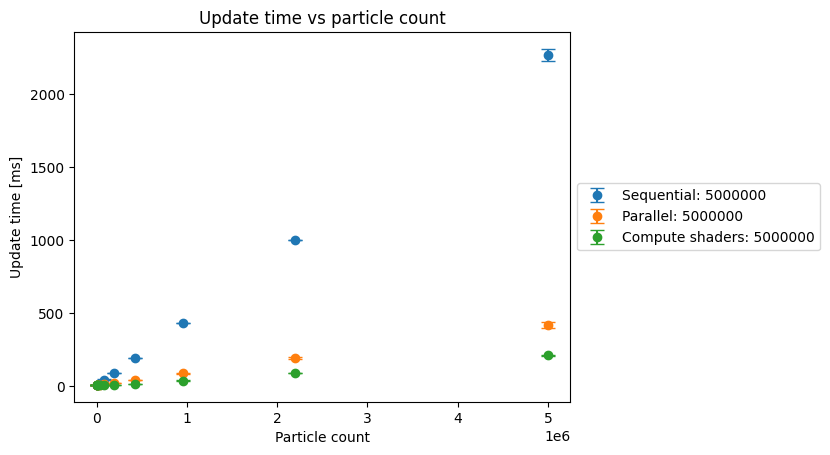

In [20]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], yerr=pd_seq["avg_time_err"], fmt='o', label=f"Sequential: {count}", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], yerr=pd_par["avg_time_err"], fmt='o', label=f"Parallel: {count}", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], yerr=pd_cs["avg_time_err"], fmt='o', label=f"Compute shaders: {count}", capsize=5)

plt.title("Update time vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

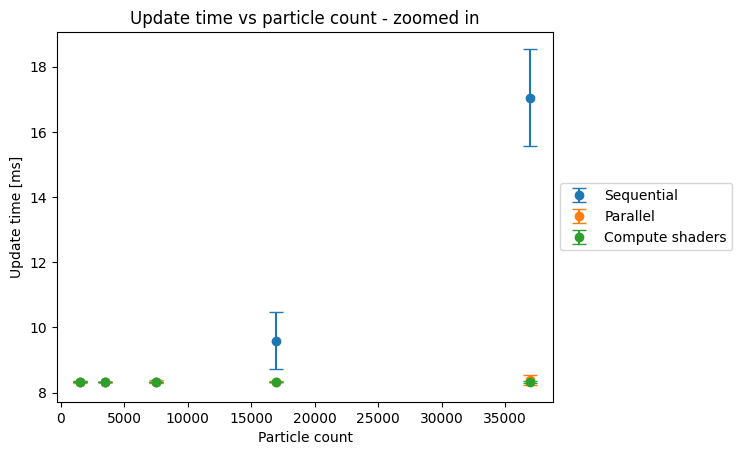

In [21]:
# Sequential
plt.errorbar(pd_seq["particle_count"][:5], pd_seq["avg_time"][:5], yerr=pd_seq["avg_time_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][:5], pd_par["avg_time"][:5], yerr=pd_par["avg_time_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][:5], pd_cs["avg_time"][:5], yerr=pd_cs["avg_time_err"][:5], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - zoomed in")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

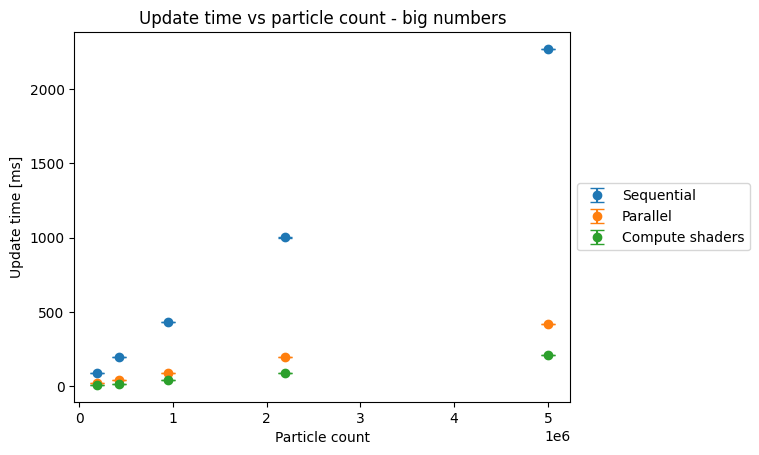

In [22]:
# Sequential
plt.errorbar(pd_seq["particle_count"][6:], pd_seq["avg_time"][6:], yerr=pd_seq["avg_time_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][6:], pd_par["avg_time"][6:], yerr=pd_par["avg_time_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][6:], pd_cs["avg_time"][6:], yerr=pd_cs["avg_time_err"][:5], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - big numbers")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

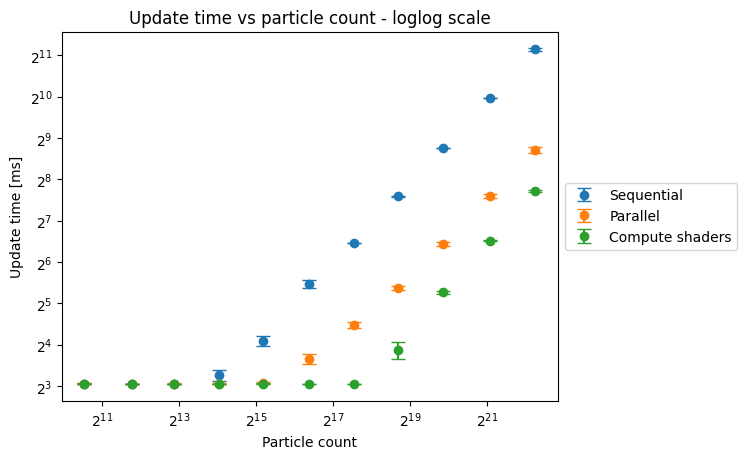

In [23]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], yerr=pd_seq["avg_time_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], yerr=pd_par["avg_time_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], yerr=pd_cs["avg_time_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - loglog scale")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

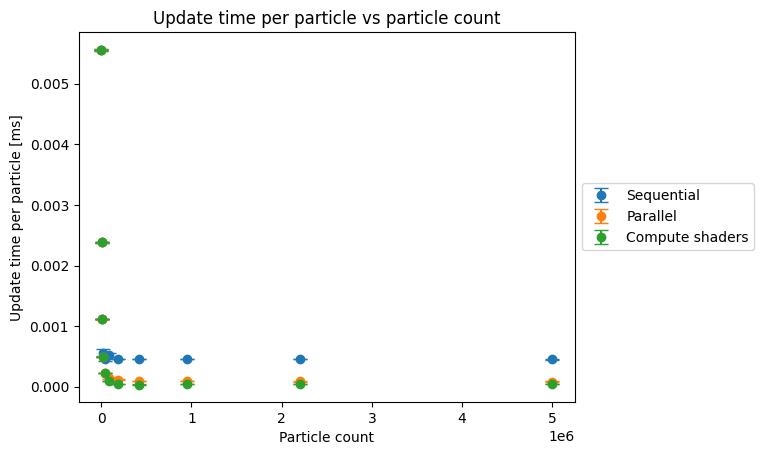

In [24]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], yerr=pd_seq["avg_time_per_particle_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], yerr=pd_par["avg_time_per_particle_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], yerr=pd_cs["avg_time_per_particle_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

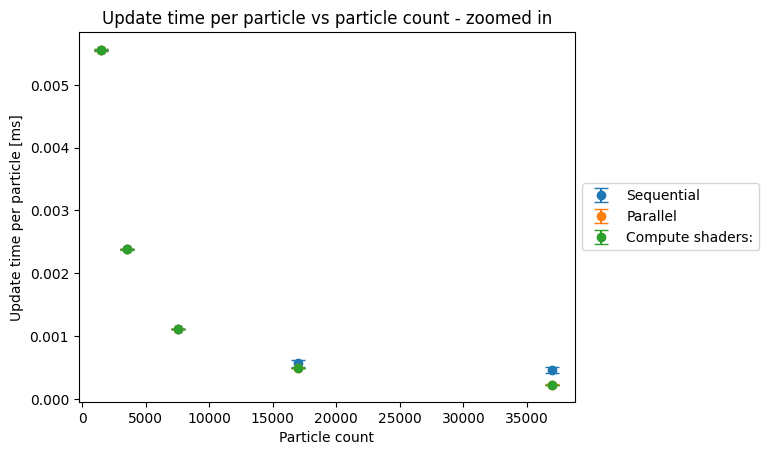

In [25]:
# Sequential
plt.errorbar(pd_seq["particle_count"][:5], pd_seq["avg_time_per_particle"][:5], yerr=pd_seq["avg_time_per_particle_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][:5], pd_par["avg_time_per_particle"][:5], yerr=pd_par["avg_time_per_particle_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][:5], pd_cs["avg_time_per_particle"][:5], yerr=pd_cs["avg_time_per_particle_err"][:5], fmt='o', label=f"Compute shaders:", capsize=5)

plt.title("Update time per particle vs particle count - zoomed in")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

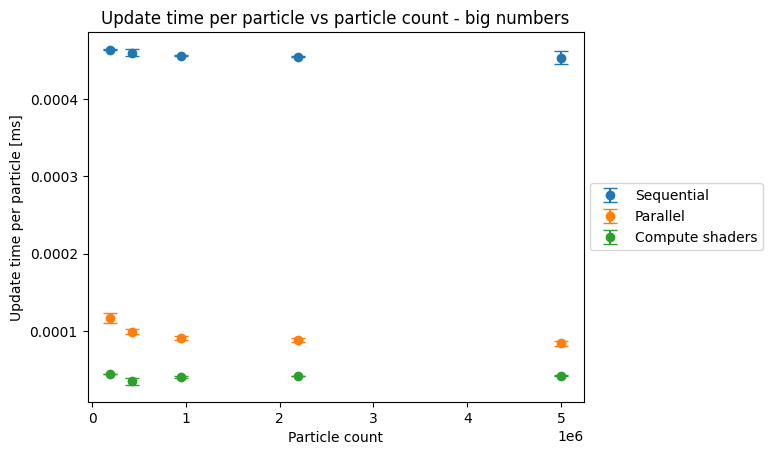

In [26]:
# Sequential
plt.errorbar(pd_seq["particle_count"][6:], pd_seq["avg_time_per_particle"][6:], yerr=pd_seq["avg_time_per_particle_err"][6:], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][6:], pd_par["avg_time_per_particle"][6:], yerr=pd_par["avg_time_per_particle_err"][6:], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][6:], pd_cs["avg_time_per_particle"][6:], yerr=pd_cs["avg_time_per_particle_err"][6:], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count - big numbers")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

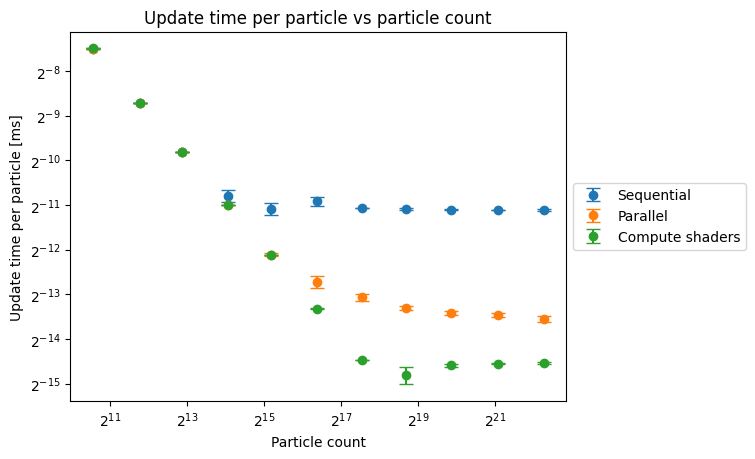

In [27]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], yerr=pd_seq["avg_time_per_particle_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], yerr=pd_par["avg_time_per_particle_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], yerr=pd_cs["avg_time_per_particle_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

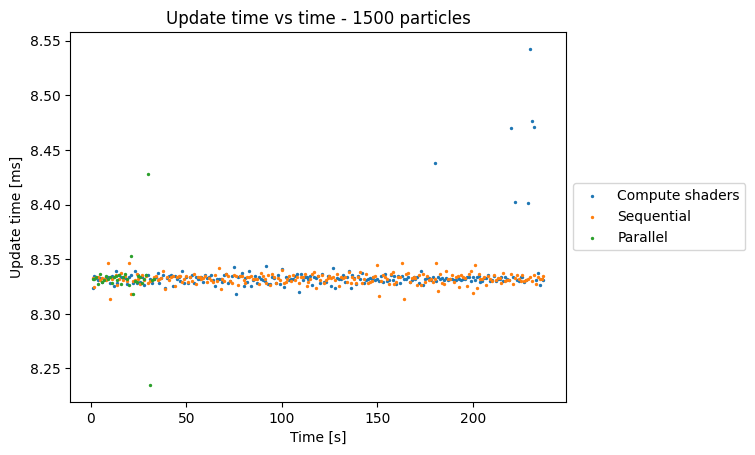

In [28]:
# Compute shaders
xs = vectorized_time_to_seconds(np.array(thousands_time_stamps[0])) - time_to_seconds(thousands_time_stamps[0][0])
plt.scatter(range(1, len(thousands[0])+1), thousands[0], label="Compute shaders", s=2)

# Sequential
xs = vectorized_time_to_seconds(np.array(thousands_time_stamps[1])) - time_to_seconds(thousands_time_stamps[1][0])
plt.scatter(range(1, len(thousands[1])+1), thousands[1], label="Sequential", s=2)

# Parallel
xs = vectorized_time_to_seconds(np.array(thousands_time_stamps[2])) - time_to_seconds(thousands_time_stamps[2][0])
plt.scatter(range(1, len(thousands[2])+1), thousands[2], label="Parallel", s=2)

# plt.ylim(1, 30)

plt.xlabel("Time [s]")
plt.ylabel("Update time [ms]")

plt.title("Update time vs time - 1500 particles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

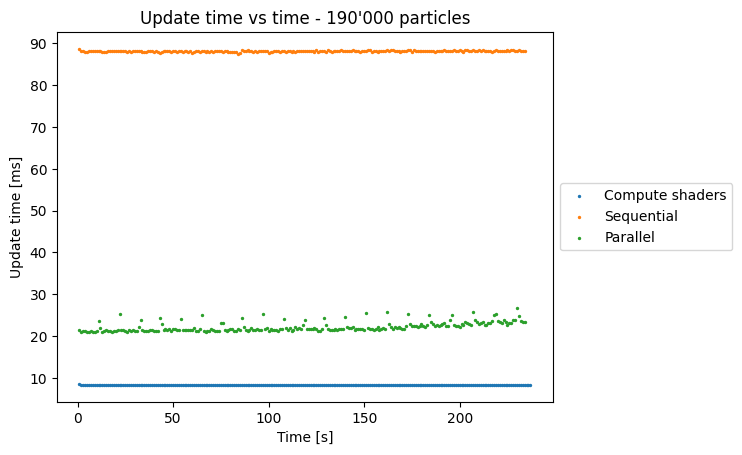

In [29]:
# Compute shaders
xs = vectorized_time_to_seconds(np.array(hundred_thousands_time_stamps[0])) - time_to_seconds(hundred_thousands_time_stamps[0][0])
plt.scatter(range(1, len(hundred_thousands[0])+1), hundred_thousands[0], label="Compute shaders", s=2)

# Sequential
xs = vectorized_time_to_seconds(np.array(hundred_thousands_time_stamps[1])) - time_to_seconds(hundred_thousands_time_stamps[1][0])
plt.scatter(range(1, len(hundred_thousands[1])+1), hundred_thousands[1], label="Sequential", s=2)

# Parallel
xs = vectorized_time_to_seconds(np.array(hundred_thousands_time_stamps[2])) - time_to_seconds(hundred_thousands_time_stamps[2][0])
plt.scatter(range(1, len(hundred_thousands[2])+1), hundred_thousands[2], label="Parallel", s=2)

# plt.ylim(1, 30)

plt.xlabel("Time [s]")
plt.ylabel("Update time [ms]")

plt.title("Update time vs time - 190'000 particles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

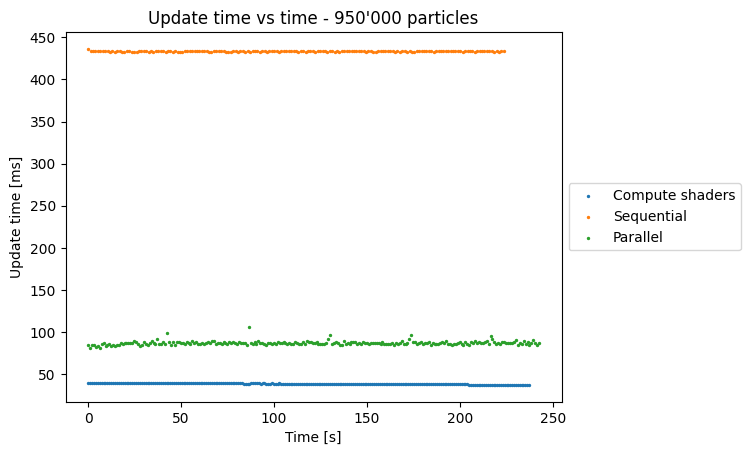

In [30]:
# Compute shaders
xs = vectorized_time_to_seconds(np.array(millions_time_stamps[0])) - time_to_seconds(millions_time_stamps[0][0])
plt.scatter(xs, millions[0], label="Compute shaders", s=2)

# Sequential
xs = vectorized_time_to_seconds(np.array(millions_time_stamps[1])) - time_to_seconds(millions_time_stamps[1][0])
plt.scatter(xs, millions[1], label="Sequential", s=2)

# Parallel
xs = vectorized_time_to_seconds(np.array(millions_time_stamps[2])) - time_to_seconds(millions_time_stamps[2][0])
plt.scatter(xs, millions[2], label="Parallel", s=2)

# plt.ylim(1, 30)

plt.xlabel("Time [s]")
plt.ylabel("Update time [ms]")

plt.title("Update time vs time - 950'000 particles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()